In [1]:
import numpy as np
import pandas as pd
import os
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

In [2]:
start = dt.datetime(2020, 1, 1)
end = dt.datetime(2021, 4, 8) 
# USING PRICES BELOW TO PULL DATA INTO FOR EACH CRYPTO INDIVIDUALLY
btc_p = web.DataReader('BTC-USD', 'yahoo', start, end) ['Close']
eth_p = web.DataReader('ETH-USD', 'yahoo', start, end) ['Close']
ltc_p = web.DataReader('LTC-USD', 'yahoo', start, end) ['Close']
link_p = web.DataReader('LINK-USD', 'yahoo', start, end) ['Close']
xpr_p = web.DataReader('XRP-USD', 'yahoo', start, end) ['Close']
trx_p = web.DataReader('TRX-USD', 'yahoo', start, end) ['Close']
#WILL CREATE 'PRICES' BELOW TO AGGREGATE VALUES OF THE PRICE VARIBLES
#prices = 
#prices = web.DataReader('BTC-USD', 'yahoo', start, end) ['Close']

prices = ltc_p
returns = prices.pct_change()
returns

Date
2020-01-01         NaN
2020-01-02   -0.052233
2020-01-03    0.065102
2020-01-04    0.021479
2020-01-05    0.005230
                ...   
2021-04-04    0.083444
2021-04-05    0.075071
2021-04-06   -0.076752
2021-04-07    0.034542
2021-04-08   -0.022646
Name: Close, Length: 461, dtype: float64

In [3]:
last_price = prices[-1]
last_price

221.86236572265625

In [4]:
last_price = prices[-1]
last_price

221.86236572265625

In [5]:
#number of sims
number_simulations = 2500
number_days = 463

In [6]:
simulation_df = pd.DataFrame()

In [7]:
for x in range (number_simulations):
    count = 0
    daily_volatility = returns.std()
    
    price_series = []
    
    price = last_price * (1 + np.random.normal(0, daily_volatility))
    price_series.append(price)
    
    for y in range(number_days):
        if count == 462:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_volatility))
        price_series.append(price)
        count += 1
    
    simulation_df[x] = price_series
        

In [8]:
simulation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,234.181311,226.649515,224.860027,230.957729,221.982368,191.296612,219.341684,224.197650,233.672566,243.273163,...,226.951753,233.931405,214.279402,199.572385,216.089342,227.487634,227.775307,199.527905,223.986475,207.119738
1,235.643279,226.220215,225.403383,239.570580,209.306870,203.767979,221.227450,219.627824,232.160475,242.056077,...,226.590088,233.381201,201.328798,199.112734,219.442907,229.519273,238.565070,195.954659,220.897941,195.474884
2,252.544668,212.139321,225.817607,227.937365,203.886311,207.222864,229.765987,216.537753,240.956769,259.823327,...,239.614309,231.458741,192.695552,202.587267,206.228966,235.751914,246.389088,201.142142,224.051619,195.080348
3,258.707002,208.024699,237.081405,233.001003,209.684633,209.840847,228.969763,231.163730,221.032063,244.748138,...,238.583851,235.132133,191.018070,214.507517,199.289929,243.618494,257.379355,199.760986,216.104688,196.922529
4,262.241393,210.725891,244.771016,230.908635,241.493923,208.031148,223.353309,250.236744,224.591959,245.129669,...,218.730659,231.180429,195.731219,217.072863,198.239575,240.643892,277.779566,213.428217,192.253227,209.988556


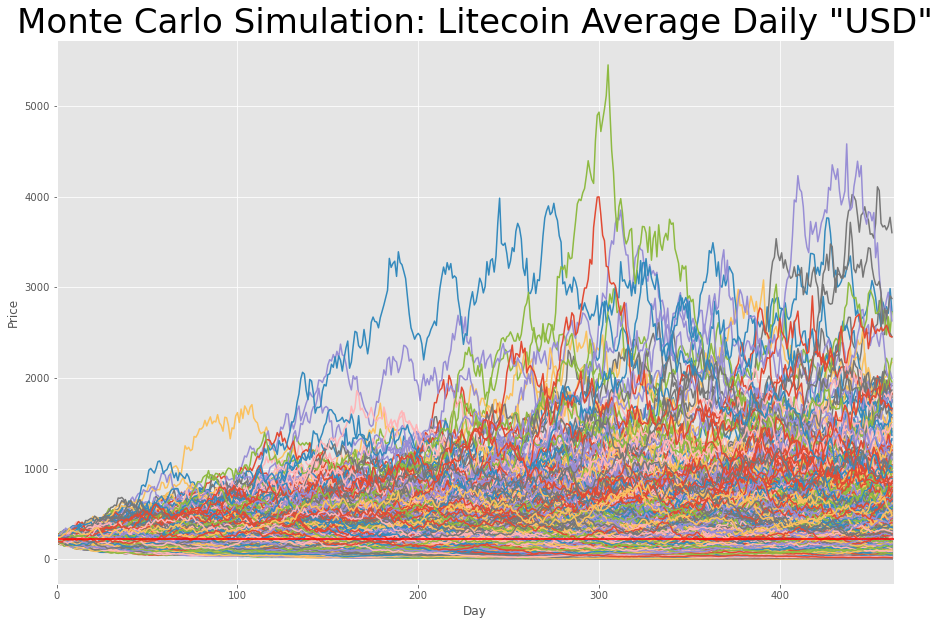

In [9]:
#Plot the Monte Carlo sim. and show
fig = plt.figure(figsize=(15,10))
plt.plot(simulation_df)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.title('Monte Carlo Simulation: Litecoin Average Daily "USD"', fontsize = 34)
plt.xlabel('Day')
plt.xlim(0, 463)
plt.ylabel('Price')
#plt.ylim(1500, )
plt.show()

In [10]:
#Getting Average EOY values
annual_values = simulation_df.iloc[462].sort_values(ascending = False)
annual_values

885     3602.863382
1963    2876.216749
372     2734.621846
1531    2728.763227
1794    2629.727288
           ...     
1191       4.953451
2304       4.757257
87         4.753536
1202       4.715374
402        2.996846
Name: 462, Length: 2500, dtype: float64

In [11]:
#Get the Index values range; mean, median, max, min
print(f'The Crypto Index Average Price the Next 365 Days is {annual_values.mean()}')
print(f'The Crypto Index Median Price the Next 365 Days is {annual_values.median()}')
print(f'The Crypto Index MAXIMUM Price the Next 365 Days is {annual_values.max()}')
print(f'The Crypto Index LOWEST Price the Next 365 Days is {annual_values.min()}')

The Crypto Index Average Price the Next 365 Days is 208.28591797335517
The Crypto Index Median Price the Next 365 Days is 112.51538788092105
The Crypto Index MAXIMUM Price the Next 365 Days is 3602.8633823440828
The Crypto Index LOWEST Price the Next 365 Days is 2.9968457261128334


C:\Users\josep\anaconda3\envs\uncc\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Deviation')

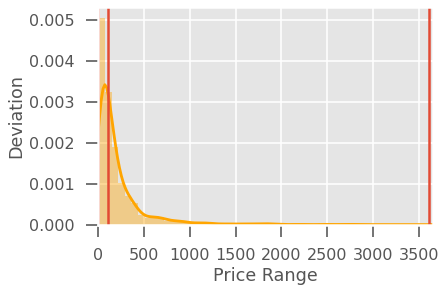

In [14]:
#Chart it all
import seaborn as seabornInstance
import seaborn as sns
plt.style.use('seaborn-poster')
%matplotlib inline

seabornInstance.distplot(annual_values, color='orange')
#seabornInstance.JointGrid(annual_values, color='orange')
#sns.set_theme()
#sns.boxplot(data=annual_values, palette="deep")
#sns.set_style("whitegrid")
#sns.despine(left=True)
sns.set_context("poster", font_scale=.5, rc={"lines.linewidth": 2.5})
plt.axvline(x=annual_values.median())
plt.axvline(x=annual_values.max())
plt.axvline(x=annual_values.min())

plt.xlabel('Price Range')
plt.xlim(0, 3650)
plt.ylabel('Deviation')


C:\Users\josep\anaconda3\envs\uncc\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josep\anaconda3\envs\uncc\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 78.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


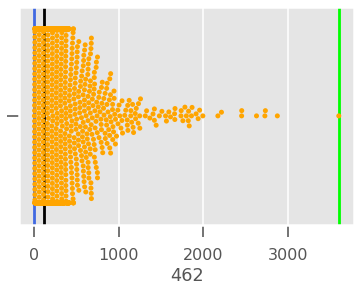

In [15]:
#Chart it all
import seaborn as seabornInstance
import seaborn as sns
plt.style.use('seaborn-poster')
%matplotlib inline

seabornInstance.swarmplot(annual_values, color='orange')

plt.axvline(x=annual_values.median(), color='black')
plt.axvline(x=annual_values.max(), color='lime')
plt.axvline(x=annual_values.min(), color='royalblue')

